In [1]:
import sys
sys.path.append('/home/pqhuy/Documents/model/TLGAN-pytorch-implement')

In [2]:
from model import Generator
from data.transform import to_tensor

In [3]:
import torch
from PIL import Image
import matplotlib.pyplot as plt

In [4]:
gen = Generator(3, 1)

In [5]:
checkpoint = torch.load('../checkpoint/7000_state_dict.pt', map_location='cpu')

In [6]:
gen.load_state_dict(checkpoint['generator'])
gen.eval()

Generator(
  (block_input): Sequential(
    (0): Conv2d(3, 64, kernel_size=(9, 9), stride=(1, 1), padding=(4, 4))
    (1): ReLU()
  )
  (blocks): ModuleList(
    (0): ResidualBlock(
      (conv_1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (ac_1): ReLU()
      (batch_norm_1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv_2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (batch_norm_2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): ResidualBlock(
      (conv_1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (ac_1): ReLU()
      (batch_norm_1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv_2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (batch_norm_2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    

In [7]:
img = Image.open('../data/dataset/croped_images/images/X00016469612_0.jpg').convert('RGB')
t_img = to_tensor(img)
with torch.no_grad():
    out_img = gen(t_img.unsqueeze(0)).squeeze(0)

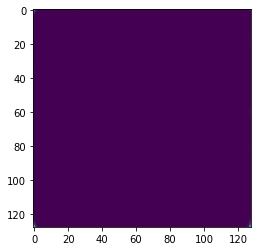

In [11]:
im = (out_img[0] > 0.5).to(dtype=torch.uint8)
plt.imshow(out_img[0])

In [16]:
out_img.max(), out_img.min()

(tensor(0.0008), tensor(8.1794e-20))

In [12]:
t = torch.load('../data/dataset/croped_images/map_images/X00016469612_0.pt')
t.max(), t.min()

(tensor(0.0114, dtype=torch.float64), tensor(0., dtype=torch.float64))

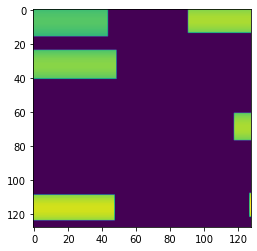

In [18]:
plt.imshow(t)

In [13]:
i = torch.randn(1, 3, 128, 128)
o = gen(i)

In [14]:
o

tensor([[[[6.7978e-07, 2.0435e-08, 5.9600e-10,  ..., 1.5934e-10,
           7.3827e-09, 3.8004e-07],
          [4.4991e-08, 4.4386e-10, 5.9671e-12,  ..., 9.8380e-13,
           9.2982e-11, 1.1708e-08],
          [2.9375e-09, 1.2911e-11, 6.1104e-14,  ..., 1.0698e-14,
           2.2187e-12, 5.7020e-10],
          ...,
          [6.4402e-07, 9.0842e-09, 1.3471e-10,  ..., 2.6415e-10,
           9.1591e-09, 3.4917e-07],
          [9.3668e-06, 2.3742e-07, 6.9966e-09,  ..., 1.6210e-08,
           3.0998e-07, 5.8142e-06],
          [9.5902e-05, 5.2220e-06, 3.5402e-07,  ..., 7.3145e-07,
           7.5393e-06, 7.8518e-05]]]], grad_fn=<SigmoidBackward0>)

In [29]:
(o.squeeze() + 0.002)

tensor([[1.1161e-05, 1.1161e-05, 1.1161e-05,  ..., 1.1161e-05, 1.1161e-05,
         1.1161e-05],
        [1.1161e-05, 1.1161e-05, 1.1161e-05,  ..., 1.1161e-05, 1.1161e-05,
         1.1161e-05],
        [1.1161e-05, 1.1161e-05, 1.1161e-05,  ..., 1.1161e-05, 1.1161e-05,
         1.1161e-05],
        ...,
        [1.1161e-05, 1.1161e-05, 1.1161e-05,  ..., 1.1161e-05, 1.1161e-05,
         1.1161e-05],
        [1.1161e-05, 1.1161e-05, 1.1161e-05,  ..., 1.1161e-05, 1.1161e-05,
         1.1161e-05],
        [1.1161e-05, 1.1161e-05, 1.1161e-05,  ..., 1.1161e-05, 1.1161e-05,
         1.1161e-05]], grad_fn=<AddBackward0>)